In [64]:
#Imports
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import f
from scipy.stats import bartlett, levene
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as st

In [2]:
#Part 1

In [3]:
df = pd.read_excel('df.xlsx')
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [4]:
# Finding Mean and Standard deviation for all column
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


In [5]:
df.isnull().sum()

Close_ETF    0
oil          0
gold         0
JPM          0
dtype: int64

In [6]:
# the sample correlations among each pair of the four random variables (columns) of the data.
corr = df.corr()
corr_mat = df.corr().abs()
corr_mat

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,0.009045,0.022996,0.036807
oil,0.009045,1.000000,0.235650,0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,0.120849,0.100170,1.000000


[Text(0.5, 0, 'Close_ETF'),
 Text(1.5, 0, 'oil'),
 Text(2.5, 0, 'gold'),
 Text(3.5, 0, 'JPM')]

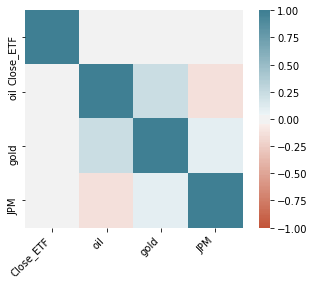

In [7]:
# Heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [8]:
# Part-2
df.columns
len(df.columns)

4

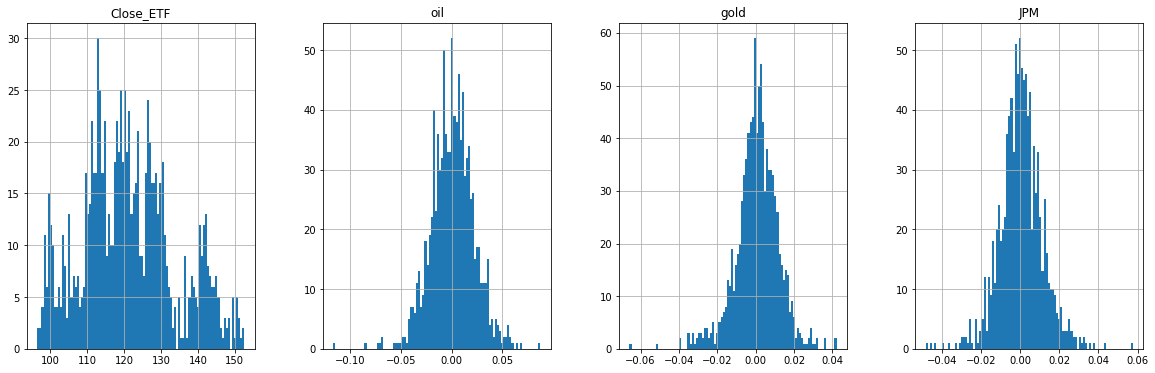

In [9]:
# 1. A histogram for each column (hint: four histograms total)
fig, axes = plt.subplots(len(df.columns)//4, 4, figsize=(20, 6))
for col, axis in zip(df.columns, axes):
    df.hist(column = col, bins = 100, ax=axis)

In [10]:
# 2. A time series plot for each column (hint: use the series “1, 2, 3, ..., 1000” as the 
# horizontal axis; four plots total)

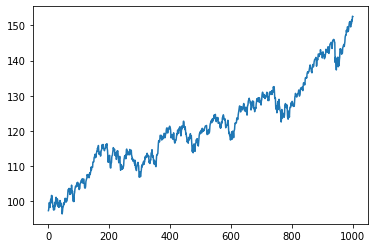

In [11]:
xaxis = np.arange(1,1001)
plt.plot(xaxis, np.array(df['Close_ETF']))
plt.show()

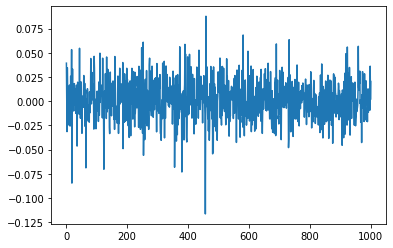

In [12]:
xaxis = np.arange(1,1001)
plt.plot(xaxis, np.array(df['oil']))
plt.show()

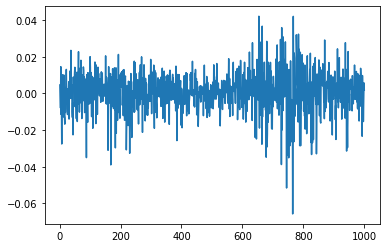

In [13]:
xaxis = np.arange(1,1001)
plt.plot(xaxis, np.array(df['gold']))
plt.show()

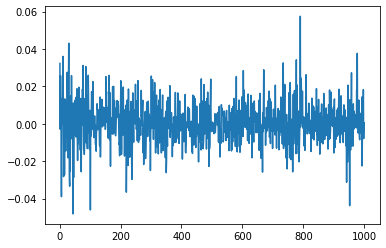

In [14]:
xaxis = np.arange(1,1001)
plt.plot(xaxis, np.array(df['JPM']))
plt.show()

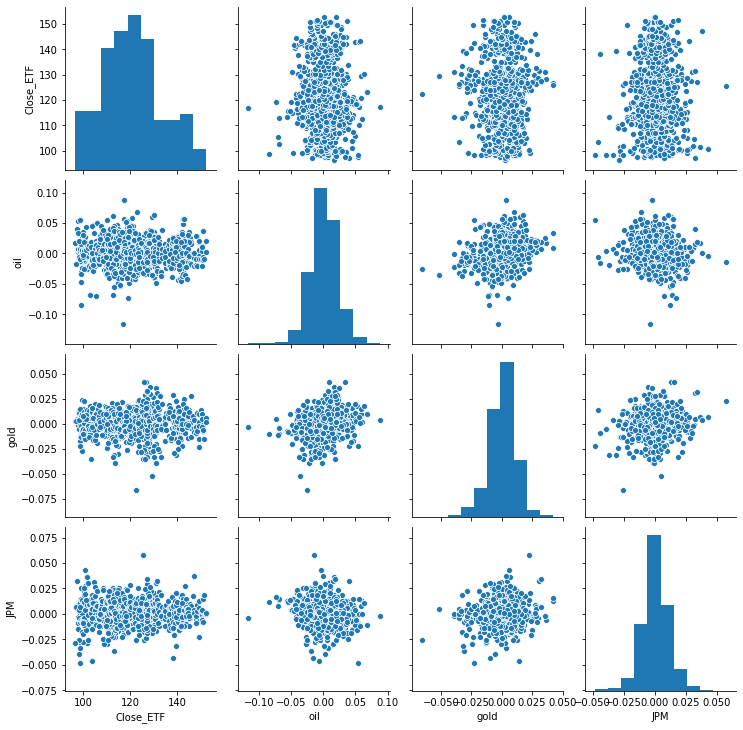

In [15]:
#3. A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)
sns.pairplot(df)

In [16]:
#4. Three scatter plots to describe the relationships between the ETF column and the OIL
# column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

Text(0, 0.5, 'oil')

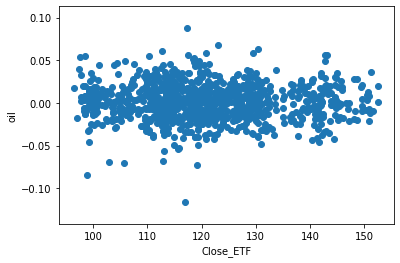

In [17]:
# Scatter Plot between ETF column and the OIL column
plt.scatter(df['Close_ETF'], df['oil'])
plt.xlabel('Close_ETF')
plt.ylabel('oil')

Text(0, 0.5, 'gold')

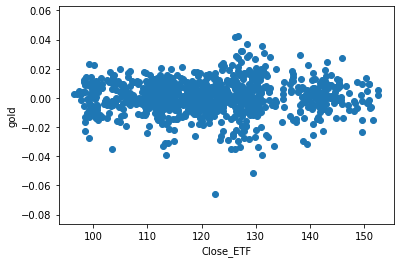

In [18]:
# Scatter Plot between ETF column and the GOLD column
plt.scatter(df['Close_ETF'], df['gold'])
plt.xlabel('Close_ETF')
plt.ylabel('gold')

Text(0, 0.5, 'JPM')

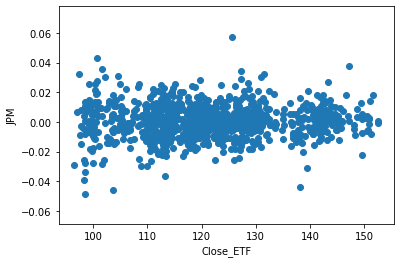

In [19]:
# Scatter Plot between ETF column and the JPM column
plt.scatter(df['Close_ETF'], df['JPM'])
plt.xlabel('Close_ETF')
plt.ylabel('JPM')

In [20]:
# Part-3
# Gaussian distribution checking for Close_ETF column (univariate observations)

seed(1)
data = df['Close_ETF']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=1.000, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=1302.829, p=0.000
Acc to chisquare test Sample does not look Gaussian (reject H0)
Statistics=27.148, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [21]:
# Gaussian distribution checking for Oil column (univariate observations)

seed(1)
data = df['oil']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.473, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=431.505, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=41.448, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [22]:
# Gaussian distribution checking for Gold column (univariate observations)

seed(1)
data = df['gold']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.483, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=192.077, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=105.760, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [23]:
# Gaussian distribution checking for Oil column (univariate observations)

seed(1)
data = df['JPM']

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

# Shapiro-Wilk Test
if p > alpha:
	print('Acc to Shapiro test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Shapiro test Sample does not look Gaussian (reject H0)')

# Kolmogorov Smirnov test
stat, p = kstest(data,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Kolmogorov-Smirnov test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)')
    
# chisquare   
stat, p = chisquare(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to chisquare test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to chisquare test Sample does not look Gaussian (reject H0)')
    
# Normal Test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Acc to Normal test Sample looks Gaussian (fail to reject H0)')
else:
	print('Acc to Normal test Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Acc to Shapiro test Sample does not look Gaussian (reject H0)
Statistics=0.483, p=0.000
Acc to Kolmogorov-Smirnov test Sample does not look Gaussian (reject H0)
Statistics=228.584, p=1.000
Acc to chisquare test Sample looks Gaussian (fail to reject H0)
Statistics=52.298, p=0.000
Acc to Normal test Sample does not look Gaussian (reject H0)


In [24]:
# Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem

In [25]:
# Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.
# Calculate the mean 𝜇𝑥 and the standard deviation 𝜎𝑥 of the population.
mean = df.mean(axis = 0, skipna = True) 
ETF_mean = mean[0]
print(f'Mean for ETF Column {ETF_mean}')

# Standard deviation for ETF Column
std = df.std(axis = 0, skipna = True) 
ETF_std = std[0]
print(f'Standard deviation for ETF Column {ETF_std}')

Mean for ETF Column 121.1529600120001
Standard deviation for ETF Column 12.569790313110744


In [26]:
# # Break the population into 50 groups sequentially and each group includes 20 values.
seq_sample_means =[]
for split in np.split(df['Close_ETF'], 50):
    seq_sample_means.append(split.mean())
print(seq_sample_means)

[99.32100080000001, 99.55399974999999, 99.15400055, 102.5505004, 103.29199994999999, 105.09350015, 106.75099975, 111.6580009, 114.49950014999999, 114.40050045000001, 112.7764996, 112.28599979999998, 111.80899930000001, 113.27149915, 109.9474991, 110.14300039999998, 112.53550035, 112.0754997, 117.78150055, 120.0504997, 118.20800089999997, 119.98099934999998, 119.76750025000001, 116.80299985000002, 117.24199984999998, 120.55450105000003, 121.09150044999998, 123.40999985, 122.7170002, 120.61099994999998, 120.50799975000002, 125.79700005000002, 126.88300015, 127.30250019999998, 128.43750040000003, 130.13649915, 130.58250049999998, 128.15899955000003, 125.12550015, 126.06000055000001, 129.02949995, 131.8114998, 135.97399985, 138.85700000000003, 141.28849860000003, 142.17150034999997, 144.6245003, 140.5229988, 144.69050135, 150.35049895]


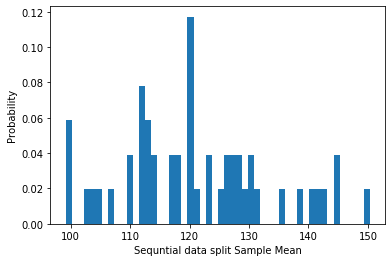

In [27]:
# Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, 
# i.e., use the histogram to assess the normality of the data consisting of these sample means.
plt.hist(seq_sample_means, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sequntial data split Sample Mean');

In [28]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

import statistics
s_mean = statistics.mean(seq_sample_means)
s_std  = statistics.stdev(seq_sample_means)                       
print(s_mean)
print(s_std)
# the standard deviation of the sample-means is equal to the standard deviation of the population divided by the square-root of the sample size √𝑛.
sigma = ETF_std/math.sqrt(20)
print(f'sample mean std dev calculated {sigma}')

121.15296001200001
12.615972812491506
sample mean std dev calculated 2.810690560303399


[100.77430028999999, 110.48050028, 112.01809938999999, 114.51720014, 118.40030004, 121.67680030000001, 125.78560011000002, 128.01269998, 135.39209964, 144.47199995]


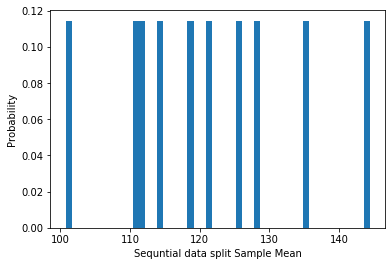

In [29]:
seq_sample_means_10 =[]
for split in np.split(df['Close_ETF'], 10):
    seq_sample_means_10.append(split.mean())
print(seq_sample_means_10)
plt.hist(seq_sample_means_10, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sequntial data split Sample Mean');

In [30]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 
s_mean = statistics.mean(seq_sample_means_10)
s_std  = statistics.stdev(seq_sample_means_10)                       
print(s_mean)
print(s_std)

# the standard deviation of the sample-means is equal to the standard deviation of the population divided by the square-root of the sample size √𝑛.
sigma = ETF_std/math.sqrt(100)
print(f'sample mean standard dev calculated {sigma}')

121.152960012
12.821725528306828
sample mean standard dev calculated 1.2569790313110745


In [31]:
# Generate 50 simple random samples or groups (with replacement) from the population.
# The size of each sample is 20, i.e., each group includes 20 values

sample_means =[] 
for _ in range(50):
    sample = df['Close_ETF'].sample(20, replace = True)
    mean = sample.mean()
    sample_means.append(mean)
print(sample_means)

[122.14449965000001, 123.5849991, 119.84849930000003, 118.57250064999998, 120.91999970000002, 120.80900109999997, 121.57049935, 122.58249924999998, 122.46399980000001, 122.1604988, 121.2350015, 122.3419994, 121.95600005000001, 117.7429996, 116.279, 121.66399994999998, 123.54649995, 119.73400085, 118.48100009999999, 123.40049924999998, 125.85850030000002, 121.08800075000002, 118.65199994999998, 120.75150035000001, 120.22400024999999, 120.9835007, 123.63649904999997, 123.34250039999999, 125.77449920000001, 123.01450025000001, 126.3799994, 125.45799830000001, 124.03899955, 121.88950075000002, 118.92400055, 121.81249995, 121.1610004, 123.09699970000001, 114.94600034999999, 122.31700099999998, 125.29949989999997, 122.43400044999998, 119.71249960000003, 118.5744996, 117.55599929999998, 125.11400045000002, 116.79550015, 118.8014999, 121.76850060000001, 117.63950045000001]


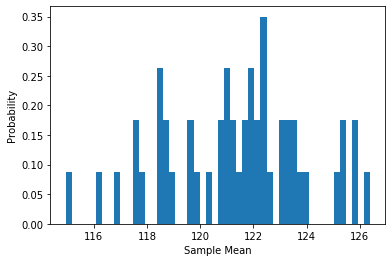

In [32]:
# Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., 
# use the histogram to assess the normality of the data consisting of these sample means.

plt.hist(sample_means, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sample Mean');

In [33]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 
s_mean = statistics.mean(sample_means)
s_std  = statistics.stdev(sample_means)                       
print(s_mean)
print(s_std)

# the standard deviation of the sample-means is equal to the standard deviation of the population divided by the square-root of the sample size √𝑛.
sigma = ETF_std/math.sqrt(20)
print(f'sample mean standard dev calculated {sigma}')

121.361659978
2.6275831923229407
sample mean standard dev calculated 2.810690560303399


In [34]:
# Generate 10 simple random samples or groups (with replacement) from the population.
# The size of each sample is 100, i.e., each group includes 100 values

sample_means_10 =[] 
for _ in range(10):
    sample = df['Close_ETF'].sample(100, replace = True)
    mean = sample.mean()
    sample_means_10.append(mean)
print(sample_means_10)

[123.55849979999999, 119.91340048000002, 120.58619982999998, 118.85829998999999, 122.33030006999999, 122.26899991000003, 120.09370039, 122.77630033000001, 120.54989913000001, 120.58039923]


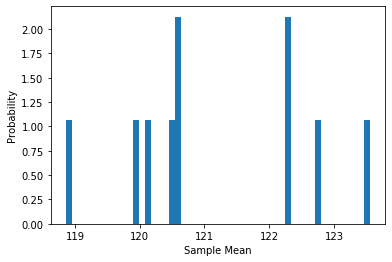

In [35]:
# # Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., 
# use the histogram to assess the normality of the data consisting of these sample means.

plt.hist(sample_means_10, density=True, bins=50)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Sample Mean');

In [36]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
# √𝑛 the number of sample means calculated from Item 

s_mean = statistics.mean(sample_means_10)
s_std  = statistics.stdev(sample_means_10)                       
print(s_mean)
print(s_std)

# the standard deviation of the sample-means is equal to the standard deviation of the population divided by the square-root of the sample size √𝑛.
sigma = ETF_std/math.sqrt(100)
print(f'sample mean standard dev calculated {sigma}')

121.15159991600001
1.4903482219603696
sample mean standard dev calculated 1.2569790313110745


In [37]:
# In Part 3 of the project, you have figured out the distribution of the population (the entire
# ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.

A standard deviation of the sample-means that is around 1.256 for 100 samples. 
A standard deviation of the sample-means that is around 2.81 for 20 samples
No matter how many times we repeat the sampling, 
the standard deviation will not change, since it only depends on the sample size 
it also depends on the population mean, but that remains a constant for a given population

In [38]:
#Part 5

#Step 1- create 95% confidence interval for the mean 

st.t.interval(alpha=0.95, df=len(sample_means_10)-1, loc=np.mean(sample_means_10), scale=st.sem(sample_means_10))

#Step 2- create 95% confidence interval for the mean 

st.t.interval(alpha=0.95, df=len(sample_means)-1, loc=np.mean(sample_means), scale=st.sem(sample_means))

(120.61490909816942, 122.10841085783059)

In [39]:
#In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) using Excel function.
#Do the two intervals from 1) and 2) above include (the true value of) the mean 𝜇? Which one is more accurate? Why?

# Yes, the True value of the mean 𝜇 from part 1 falls in the range of confidence intervals of step 1 and 2.

In [40]:
#Part6 Still Working

#Step 1
#Use the same sample you picked up in Step 1) of Part 5 to test 𝑯𝟎:𝝁=𝟏𝟎𝟎 vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎 
#at the significance level 0.05. What’syour conclusion? 

hypo = sample_means_10.copy()
print("Mean of 10 samples:", statistics.mean(hypo))
print("𝑯𝟎 : 𝝁=𝟏𝟎𝟎")
print("𝑯𝒂 : 𝝁≠𝟏𝟎𝟎")
ttest,P_Value=ttest_1samp(hypo,120)
print("P_Value:",P_Value)
print("TTest:",ttest)

sig_value = .05
if P_Value > sig_value:   
    print("Rejecting the null hypothesis")
else:
    print("Not Rejecting the Null Hypothesis")

Mean of 10 samples: 121.15159991600001
𝑯𝟎 : 𝝁=𝟏𝟎𝟎
𝑯𝒂 : 𝝁≠𝟏𝟎𝟎
P_Value: 0.03715021159221747
TTest: 2.4435085936013206
Not Rejecting the Null Hypothesis


In [41]:
ttest, P_Value=ttest_1samp(hypo,100)
print("P_Value:",P_Value)
if P_Value > sig_value:   
    print("Rejecting the null hypothesis")
else:
    print(" Not Rejecting the Null Hypothesis")

P_Value: 6.767847939763389e-12
 Not Rejecting the Null Hypothesis


In [42]:
#Step 2
#Use the same sample you picked up inStep 2) of Part 5 to test 𝑯𝟎:𝝁=𝟏𝟎𝟎 vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎 at the significance level 0.05.

hypo1 = sample_means.copy()
print("Mean of 50 samples:", statistics.mean(hypo1))
print("𝑯𝟎 : 𝝁=𝟏𝟎𝟎")
print("𝑯𝒂 : 𝝁≠𝟏𝟎𝟎")
ttest, P_Value=ttest_1samp(hypo,119)
print("P_Value:",P_Value)
print("TTest:",ttest)
if P_Value > sig_value:   
    print("Rejecting the null hypothesis")
else:
    print("Not Rejecting the Null Hypothesis")

Mean of 50 samples: 121.361659978
𝑯𝟎 : 𝝁=𝟏𝟎𝟎
𝑯𝒂 : 𝝁≠𝟏𝟎𝟎
P_Value: 0.0013558734066260365
TTest: 4.565346707387099
Not Rejecting the Null Hypothesis


In [55]:
ttest, P_Value=ttest_1samp(hypo1,100)
print("P_Value",P_Value)
if P_Value > sig_value:   
    print("Rejecting the null hypothesis")
else:
    print("Not Rejecting the Null Hypothesis")
#step 3 and step 4 (Still Working)

P_Value 1.236737724140348e-46
Not Rejecting the Null Hypothesis


In [44]:
#Part 7
# Compare your data with a different data set
#1) Consider the entire Gold column as a random sample from the first population, and the
#entire Oil column as a random sample from the second population. Assuming these two
#samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil
#have equal means in the significance level 0.05.
part7 = pd.read_excel('df.xlsx')
meanGold = np.mean(part7['gold'])
meanOil = np.mean(part7['oil'])
varGold = np.var(part7['gold'])
varOil = np.var(part7['oil'])
p7alpha = .05
print('mean gold is ' + str(meanGold))
print('mean oil is ' + str(meanOil))
print('var gold is ' + str(varGold))
print('var oil is ' + str(varOil))
testing1 = ttest_ind(part7['gold'], part7['oil'], equal_var=False) #2 sided to sample t test
print('H0: Mean Oil = Mean Gold')
print('HA: Mean Oil not equal Mean Gold')
print(testing1)
if testing1[1]>p7alpha:
    print('The pvalue of ' + str(testing1[1]) + ' is greater than the the significance level of ' + str(p7alpha) + '. Thus we do not reject the null hypothesis')
else:
    print('The pvalue of ' + str(testing1[1]) + ' is less than or equal to the the significance level of ' + str(p7alpha) + '. Thus we reject the null hypothesis')

mean gold is 0.0006628360819999999
mean oil is 0.0010300354937470017
var gold is 0.00012731543865693258
var oil is 0.00044446545891371905
H0: Mean Oil = Mean Gold
HA: Mean Oil not equal Mean Gold
Ttest_indResult(statistic=-0.4853666138236087, pvalue=0.6274858963882113)
The pvalue of 0.6274858963882113 is greater than the the significance level of 0.05. Thus we do not reject the null hypothesis


In [60]:
#2)Subtract the entire Gold column from the entire Oil column 
#and generate a sample of differences. Consider this sample as a random sample 
#from the target population of differences between Gold and Oil. Form a 
#hypothesis and test it to see if the Gold and Oil have equal means in 
#the significance level 0.05.

part7['difference'] = part7['oil'] - part7['gold']
print(part7['difference'].head())
#As per my email with Professor Zhong we test to see if the population mean of 'difference' is equal to 0
testing2 = ttest_1samp(part7['difference'], 0) #2 sided t test with 1 sample given
print(testing2)
print('H0: Mean (Oil - Gold) = 0')
print('HA: Mean (Oil - Gold) not equal 0')
if testing2[1]>p7alpha:
    print('The pvalue of ' + str(testing2[1]) + ' is greater than the the significance level of ' + str(p7alpha) + '. Thus we do not reject the null hypothesis')
else:
    print('The pvalue of ' + str(testing2[1]) + ' is less than or equal to the the significance level of ' + str(p7alpha) + '. Thus we reject the null hypothesis')

0    0.034574
1    0.003320
2   -0.023577
3    0.019931
4    0.025038
Name: difference, dtype: float64
Ttest_1sampResult(statistic=0.5413309278514735, pvalue=0.5884002009146817)
H0: Mean (Oil - Gold) = 0
HA: Mean (Oil - Gold) not equal 0
The pvalue of 0.5884002009146817 is greater than the the significance level of 0.05. Thus we do not reject the null hypothesis


In [46]:
#3)Consider the entire Gold column as a random sample 
#from the first population,and the entire Oil column as a random 
#sample from the second population. Assuming these two samples be
#drawn independently, form a hypothesis and test it to see if 
#the Gold and Oil have equal standard deviations in the significance level 0.05.
x = part7['gold']
y = part7['oil']
fvalue = np.var(y, ddof=1)/np.var(x, ddof=1) #calculate F test statistic 
dfn = x.size-1 #define degrees of freedom numerator 
dfd = y.size-1 #define degrees of freedom denominator
pvalue = 1 - (f.cdf(fvalue, dfn, dfd))
print(fvalue, pvalue)
levenetest = levene(x,y)
bartlettest = bartlett(x,y) 
print(levenetest)
print(bartlettest)
print('H0: StdDev Oil = StdDev Gold')
print('HA: StdDev Oil not equal StdDev Gold')
if pvalue>p7alpha:
    print('The pvalue of ' + str(pvalue) + ' is greater than the the significance level of ' + str(p7alpha) + '. Thus we do not reject the null hypothesis')
else:
    print('The pvalue of ' + str(pvalue) + ' is less than or equal to the the significance level of ' + str(p7alpha) + '. Thus we reject the null hypothesis')
print('Using the scipy library we can quickly use the bartlett and levene test. Both of which also have a pvalue significantly less than alpha. Thus once again we can confidently reject the Null Hypothesis')

3.491057043846717 1.1102230246251565e-16
LeveneResult(statistic=263.9638811080533, pvalue=7.588193343698025e-56)
BartlettResult(statistic=367.1258383807035, pvalue=7.906689618563355e-82)
H0: StdDev Oil = StdDev Gold
HA: StdDev Oil not equal StdDev Gold
The pvalue of 1.1102230246251565e-16 is less than or equal to the the significance level of 0.05. Thus we reject the null hypothesis
Using the scipy library we can quickly use the bartlett and levene test. Both of which also have a pvalue significantly less than alpha. Thus once again we can confidently reject the Null Hypothesis


The linear relation appears to give a sense that if the relative change in gold prices goes up there will be an extremely slight increase in the daily etf return


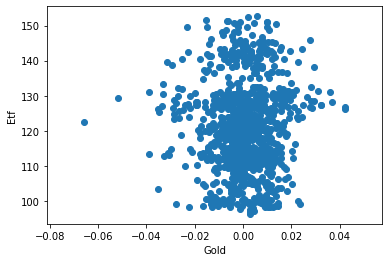

In [47]:
#Part 8: Fitting the line to the data
#Requirements –
#Consider the data including the ETF column and Gold column only. Using any software,
#1) Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between
#them which can be observed from the scatter plot?
part8 = pd.read_excel('df.xlsx')
gold = part8['gold']
etf = part8['Close_ETF']
plt.scatter(gold, etf)
plt.xlabel('Gold')
plt.ylabel('Etf')
print('The linear relation appears to give a sense that if the relative change in gold prices goes up there will be an extremely slight increase in the daily etf return')

In [48]:
#2) Calculate the coefficient of correlation between ETF and Gold and interpret it.
r = gold.corr(etf) #built in function to find pearsons r using pandas dataframe
print('The Pearson Coefficient of Correlation is ' + str(r))
print('This means that there is a weak positive correlation between ETF and Gold, but they are very close to being independant')

The Pearson Coefficient of Correlation is 0.022995570076054607
This means that there is a weak positive correlation between ETF and Gold, but they are very close to being independant


25.604389324427277 121.13598849889819 0.022995570076054603 0.467611780618294 35.236285000863866
The slope is 25.60438932442505
The Y intercept is 121.13598849889821


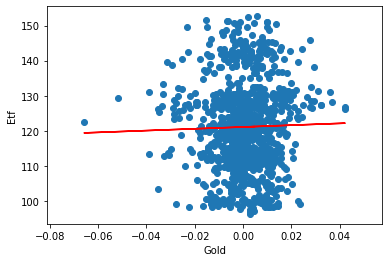

In [66]:
#3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are
#the intercept and slope of this line? How to interpret them?
plt.scatter(gold, etf)
plt.xlabel('Gold')
plt.ylabel('Etf')
slope, intercept, r_value, p_value, std_err = linregress(gold,etf)
b1 = slope
b0 = intercept
plt.plot(gold, b1*gold + b0, color = 'red')
print('The slope is ' + str(b1))
print('The Y intercept is ' + str(b0))
#Interpretations

In [67]:
#4) Conduct a two-tailed t-test with H 0 : β 1 = 0. What is the P-value of the test? Is the linear
#relationship between ETF (Y) and Gold (X) significant at the significance level 0.01?
#Why or why not?

#note: beta1 is m in y = mx+b
print('H0: β1=0')
print('H1: β1 not equal to 0')
slope0test = p_value
p8alpha = .01
if slope0test>p8alpha:
    print('The pvalue of ' + str(slope0test) + ' is greater than the the significance level of ' + str(p8alpha) + '. Thus we do not reject the null hypothesis')
else:
    print('The pvalue of ' + str(slope0test) + ' is less than or equal to the the significance level of ' + str(p8alpha) + '. Thus we reject the null hypothesis')
    
#discuss significance and relationship

H0: β1=0
H1: β1 not equal to 0
The pvalue of 0.467611780618294 is greater than the the significance level of 0.01. Thus we do not reject the null hypothesis


In [51]:
#5) Suppose that you use the coefficient of determination to assess the quality of this fitting.
#Is it a good model? Why or why not?

In [52]:
#6) What are the assumptions you made for this model fitting?

print('The only significant assumptions we made was the complete data set was a random sample')

In [53]:
#7) Given the daily relative change in the gold price is 0.005127. Calculate the 99%
#confidence interval of the mean daily ETF return, and the 99% prediction interval of the
#individual daily ETF return.